# Hantering av saknade värden

> Obviously the best way to treat missing data is not to have them.

*(Orchard and Woodbury, 1972)*

## Sätt att hantera saknade värden

När vi hanterar saknade data finns det tre huvudsakliga sätt att gå till väga:

1. Skaffa den saknade datan. Det är dock sällan praktiskt möjligt, varför de två följande sätten är vanligare.
2. Ta bort den saknade datan.
3. Ersätta, eller *imputera*, den saknade datan med rimliga uppskattningar.

Vilket sätt vi väljer bör baseras på en analys av varför datan saknas.

## Anledningar till att data saknas

Det finns olika anledningar till att data saknas. Man brukar dela upp dem i tre kategorier:

### Missing completely at random (MCAR)
Om sannolikheten att data saknas är lika stor över hela datasetet kallas det *missing completely at random* (MCAR). Det pekar på att saknaden av data inte är relaterad till datan själv. I det här fallet brukar vi kunna ta bort den saknade datan utan att riskera att det påverkar modellen mer än att vi får mindre data att träna den på. Vi kan också använda olika typer av imputation, vilket vi återkommer till längre fram.

### Missing at random (MAR)
Det här är en lite olyckligt döpt kategori eftersom man inte riktigt menar "random".

Här är sannolikheten att data saknas är lika stor inom *undergrupper* av datan. Det pekar på att saknaden av datan är beroende av någonting i den *observerade* datan, exempelvis att det saknas fler blodtrycksmätningar på yngre personer eftersom det är vanligare att ta blodtrycket på äldre. Om vi tar bort observationer med saknade värden kommer vi alltså ta bort fler observationer av vissa undergrupper, vilket troligtvis påverkar vår modell och gör den mindre statistiskt pålitlig. Här är imputation ett bättre alternativ.

### Missing not at random (MNAR)
Det här är den klurigaste kategorin, för här verkar det som att sannolikheten för att data saknas varken är densamma över hela datasetet, eller kan härledas till andra faktorer i datasetet. Det pekar alltså på att anledningen finns *i den saknade datan själv*. Och den kan vi ju inte analysera, eftersom den saknas. Eftersom vi inte vet varför datan saknas, men det inte heller verkar bero på slumpen, kan vi inte ta bort observationerna med saknad data utan att riskera att introducera *bias* i modellen. 

Om man har en MNAR-situation, är det bra att försöka forska vidare i vad som ligger bakom att viss data saknas - om möjligheten finns. Annars är olika typer av imputation rimliga även i det här fallet.

## Ta bort data

Om vi bestämmer oss för att ta bort observationerna med saknade värden, kan vi välja att antingen ta bort dem på radnivå, det vill säga ta bort de observationer som har saknade värden i någon kolumn, eller på kolumn-nivå, det vill säga ta bort de kolumner som har saknade värden i någon rad.

Tar vi bort rader får vi mindre data att träna på, men om vi tar bort kolumner riskerar vi att förlora *features* som egentligen är betydelsefulla för modellen.

## Imputation med pandas
Istället för att ta bort observationer med saknade värden kan vi alltså ersätta dem med rimliga uppskattningar. Det finns ett antal olika sätt att göra. De är vanligt att man ersätter saknade värden med medelvärdet, medianen eller typvärdet.

In [35]:
import numpy as np
import pandas as pd
from itertools import repeat

rng = np.random.default_rng(seed=42)

n_samples = 15
n_missing_samples = 5

missing_samples = np.zeros(n_samples, dtype=bool)
missing_samples[:n_missing_samples] = True

df = pd.DataFrame({"a": rng.random(n_samples), "b": rng.normal(size=n_samples), "c": pd.date_range("20250218", "20250304").day_name()})
idx = df.sample(5).index.values
df.loc[idx, "a"] = np.nan
idx = df.sample(5).index.values
df.loc[idx, "b"] = np.nan

df.loc[df.index % 5 != 0, "c"] = np.nan


In [36]:
df

,a,b,c
0,NaN,-0.859292,Tuesday
1,0.438878,NaN,NaN
2,0.858598,-0.958883,NaN
3,NaN,NaN,NaN
4,0.094177,-0.049926,NaN
5,0.975622,-0.184862,Sunday
6,NaN,-0.680930,NaN
7,0.786064,1.222541,NaN
8,NaN,NaN,NaN
9,0.450386,NaN,NaN


In [37]:
df.fillna({"b": 0})

,a,b,c
0,NaN,-0.859292,Tuesday
1,0.438878,0.000000,NaN
2,0.858598,-0.958883,NaN
3,NaN,0.000000,NaN
4,0.094177,-0.049926,NaN
5,0.975622,-0.184862,Sunday
6,NaN,-0.680930,NaN
7,0.786064,1.222541,NaN
8,NaN,0.000000,NaN
9,0.450386,0.000000,NaN


In [38]:
df.head()

,a,b,c
0,NaN,-0.859292,Tuesday
1,0.438878,NaN,NaN
2,0.858598,-0.958883,NaN
3,NaN,NaN,NaN
4,0.094177,-0.049926,NaN


In [39]:
df.fillna({"a": df.a.mean(), "b": df.b.median()}, inplace=True)
df

,a,b,c
0,0.588457,-0.859292,Tuesday
1,0.438878,-0.117394,NaN
2,0.858598,-0.958883,NaN
3,0.588457,-0.117394,NaN
4,0.094177,-0.049926,NaN
5,0.975622,-0.184862,Sunday
6,0.588457,-0.680930,NaN
7,0.786064,1.222541,NaN
8,0.588457,-0.117394,NaN
9,0.450386,-0.117394,NaN


In [40]:
df["c"] = df.c.ffill()
df

,a,b,c
0,0.588457,-0.859292,Tuesday
1,0.438878,-0.117394,Tuesday
2,0.858598,-0.958883,Tuesday
3,0.588457,-0.117394,Tuesday
4,0.094177,-0.049926,Tuesday
5,0.975622,-0.184862,Sunday
6,0.588457,-0.680930,Sunday
7,0.786064,1.222541,Sunday
8,0.588457,-0.117394,Sunday
9,0.450386,-0.117394,Sunday


In [ ]:
df.b.std()


Följande exempel är baserat på https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py

## Imputation med scikit-learn
### Skapa saknade värden
Vi kommer att titta på två dataset från scikit-learn: *Diabetes* och *California Housing*.

De saknar inga värden från början, så vi får ta bort lite värden slumpmässigt.

*California*-datasetet innehåller över 20 000 rader och 8 *features* så vi nöjer oss med en mycket mindre del för att snabba upp träningen. *Diabetes* innehåller visserligen bara 442 rader men vi kortar ned det också för jämförelsens skull.

In [4]:
import numpy as np
from sklearn.datasets import fetch_california_housing, load_diabetes

rng = np.random.RandomState(42)

X_diabetes, y_diabetes = load_diabetes(return_X_y=True)
X_california, y_california = fetch_california_housing(return_X_y=True)
X_california = X_california[:300]
y_california = y_california[:300]
X_diabetes = X_diabetes[:300]
y_diabetes = y_diabetes[:300]


def add_missing_values(X_full, y_full):
    n_samples, n_features = X_full.shape

    # Add missing values in 75% of the lines
    missing_rate = 0.75
    n_missing_samples = int(n_samples * missing_rate)

    missing_samples = np.zeros(n_samples, dtype=bool)
    missing_samples[:n_missing_samples] = True

    rng.shuffle(missing_samples)
    missing_features = rng.randint(0, n_features, n_missing_samples)
    X_missing = X_full.copy()
    X_missing[missing_samples, missing_features] = np.nan
    y_missing = y_full.copy()

    return X_missing, y_missing


X_miss_california, y_miss_california = add_missing_values(X_california, y_california)

X_miss_diabetes, y_miss_diabetes = add_missing_values(X_diabetes, y_diabetes)

Vi ska träna en `RandomForestRegressor` på ett antal varianter av våra två dataset.

In [5]:
rng = np.random.RandomState(0)

from sklearn.ensemble import RandomForestRegressor

Scikit-learn har ett antal `Imputer`-klasser, som är *transformers*. De tränas på datan med `fit()` och uppdaterar datan med `transform()`.

En `SimpleImputer` är den enklaste varianten och fungerar ungefär som i pandas-exemplena ovan. Den kan fylla saknade värden med en konstant eller med exempelvis medelvärdet. 

`KNNImputer` använder *k-Nearest neighbors* för att uppskatta rimliga värden att ersätta de saknade med. Vi kommer att läsa mer om KNN länge fram i kursen.

Den sista *imputern* vi ska använda är en `IterativeImputer`. Den är fortfarande på experimentstadiet, men går i korthet ut på att den för varje *feature* med saknade värden utgår från andra *features* för att uppskatta rimliga värden. Ett mycket bra alternativ vid MAR-situationer.

In [6]:
# To use the experimental IterativeImputer, we need to explicitly ask for it:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

N_SPLITS = 4
regressor = RandomForestRegressor(random_state=0)

In [7]:
def get_scores_for_imputer(imputer, X_missing, y_missing):
    estimator = make_pipeline(imputer, regressor)
    impute_scores = cross_val_score(estimator, X_missing, y_missing, scoring="neg_mean_squared_error", cv=N_SPLITS)
    return impute_scores.mean(), impute_scores.std()


x_labels = []

mses_california = np.zeros(5)
stds_california = np.zeros(5)
mses_diabetes = np.zeros(5)
stds_diabetes = np.zeros(5)

In [8]:
def get_full_score(X_full, y_full):
    full_scores = cross_val_score(
        regressor, X_full, y_full, scoring="neg_mean_squared_error", cv=N_SPLITS
    )
    return full_scores.mean(), full_scores.std()


mses_california[0], stds_california[0] = get_full_score(X_california, y_california)
mses_diabetes[0], stds_diabetes[0] = get_full_score(X_diabetes, y_diabetes)
x_labels.append("Full data")

In [9]:
imputer = SimpleImputer(
    missing_values=np.nan, add_indicator=True, strategy="constant", fill_value=0
)

mses_california[1], stds_california[1] = get_scores_for_imputer(imputer, X_miss_california, y_miss_california)
mses_diabetes[1], stds_diabetes[1] = get_scores_for_imputer(imputer, X_miss_diabetes, y_miss_diabetes)
x_labels.append("Zero imputation")

In [10]:
imputer = KNNImputer(missing_values=np.nan, add_indicator=True)

mses_california[2], stds_california[2] = get_scores_for_imputer(imputer, X_miss_california, y_miss_california)
mses_diabetes[2], stds_diabetes[2] = get_scores_for_imputer(imputer, X_miss_diabetes, y_miss_diabetes)
x_labels.append("KNN Imputation")

In [11]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean", add_indicator=True)

mses_california[3], stds_california[3] = get_scores_for_imputer(imputer, X_miss_california, y_miss_california)
mses_diabetes[3], stds_diabetes[3] = get_scores_for_imputer(imputer, X_miss_diabetes, y_miss_diabetes)
x_labels.append("Mean Imputation")

In [16]:
imputer = IterativeImputer(
    missing_values=np.nan,
    add_indicator=True,
    random_state=0,
    n_nearest_features=3,
    max_iter=2,
    sample_posterior=True,
)

mses_california[4], stds_california[4] = get_scores_for_imputer(imputer, X_miss_california, y_miss_california)
mses_diabetes[4], stds_diabetes[4] = get_scores_for_imputer(imputer, X_miss_diabetes, y_miss_diabetes)
x_labels[4] = ("Iterative Imputation")

mses_diabetes = mses_diabetes * -1
mses_california = mses_california * -1

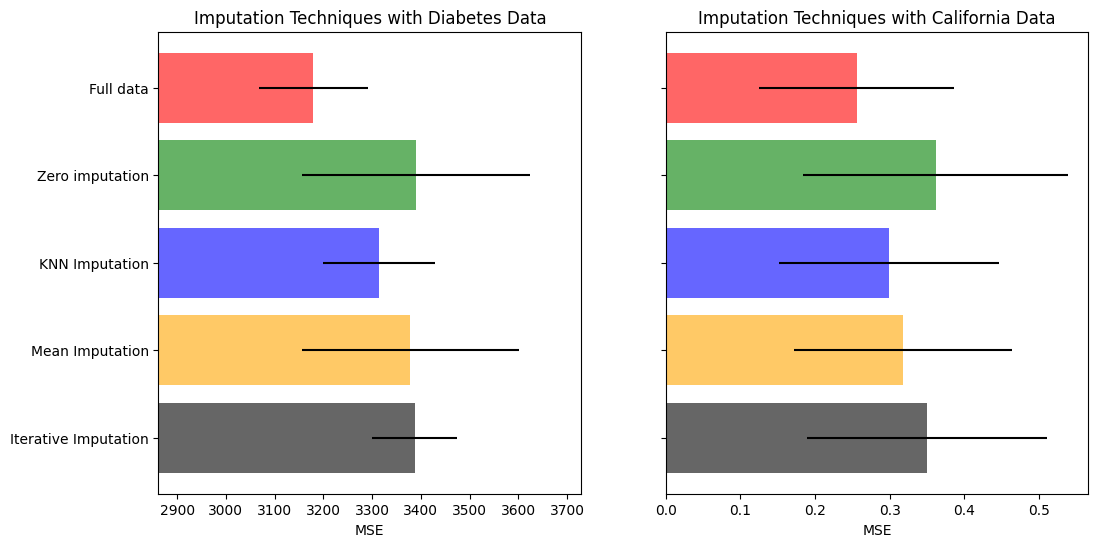

In [20]:
import matplotlib.pyplot as plt

n_bars = len(mses_diabetes)
xval = np.arange(n_bars)

colors = ["r", "g", "b", "orange", "black"]

# plot diabetes results
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
for j in xval:
    ax1.barh(
        j,
        mses_diabetes[j],
        xerr=stds_diabetes[j],
        color=colors[j],
        alpha=0.6,
        align="center",
    )

ax1.set_title("Imputation Techniques with Diabetes Data")
ax1.set_xlim(left=np.min(mses_diabetes) * 0.9, right=np.max(mses_diabetes) * 1.1)
ax1.set_yticks(xval)
ax1.set_xlabel("MSE")
ax1.invert_yaxis()
ax1.set_yticklabels(x_labels)

# plot california dataset results
ax2 = plt.subplot(122)
for j in xval:
    ax2.barh(
        j,
        mses_california[j],
        xerr=stds_california[j],
        color=colors[j],
        alpha=0.6,
        align="center",
    )

ax2.set_title("Imputation Techniques with California Data")
ax2.set_yticks(xval)
ax2.set_xlabel("MSE")
ax2.invert_yaxis()
ax2.set_yticklabels([""] * n_bars)

plt.show()